# Pool detection in Sant Just using python

In this post we will focus on extracting private swimming pools for the town of Sant Just Desvern (Barcelona, Spain) using remote sensing data and python tools, and aggregate them at the census tract level. The motivation behind this post is twofold. First, I'd like to try out several python-based tools I have never used (*pyearth*) and get more familiar with packages I have used but that I want to explore further (*geopandas*). Second, I will use the extracted information to correlate pool presence with income in the city and thus test basic statistical capabilities (this will be in a second notebook). 

This script was written in a Jupyter notebook and converted to a markdown file to be able to merge it in the *blogdown* R-based blog. Let's get started!

In [1]:
import geopandas

## Preprocessing boundaries and land cover

First, we read the municipality boundaries and the land cover data of the region. We do some data cleaning by giving meaningful names to the land cover class and we make a nice preliminary map.

In [25]:
# Read boundaries
stjust = geopandas.read_file("data/boundaries/sant-just.geojson")

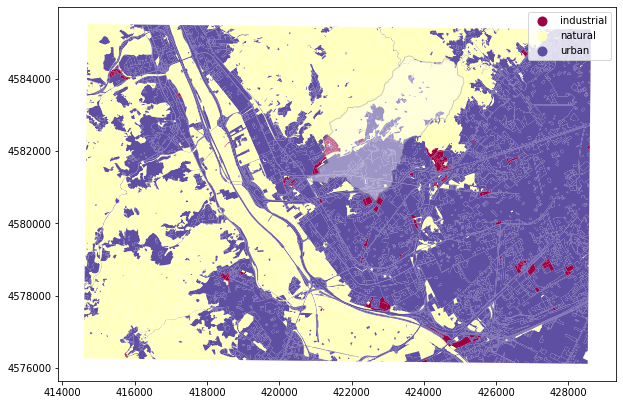

In [40]:
# Read land cover data of the region
lc = geopandas.read_file("data/landcover/sant-just/42022.shp")

# Some data cleaning
lc.CONSTRUC.fillna(value='natural', inplace=True)
lc.CONSTRUC.replace('a', 'urban', inplace=True)
lc.CONSTRUC.replace('c', 'industrial', inplace=True)

# Let's plot it!
base = lc.plot(column = 'CONSTRUC', legend = True, categorical = True, cmap = 'Spectral', figsize=(10,10))
stjust.plot(ax=base, color='white', edgecolor='grey', alpha=0.4);

Let's make our lives easier, and clip the data to the municipality under study. Furthermore, since we are interested in private swimming pools only, and not any type of natural water body or similar, we will only keep that class.

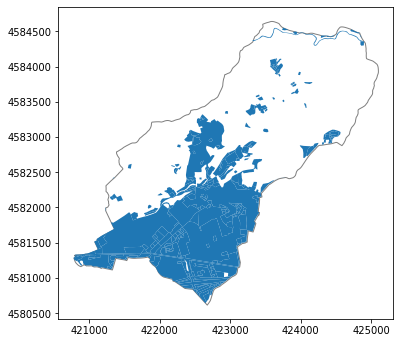

In [41]:
# Clip to the muncipalities, and keep urban polygons only
lc_clip = geopandas.overlay(lc, stjust, how="intersection")
lc_clip = lc_clip[lc_clip.CONSTRUC.eq('urban')]

# Let's plot
base = stjust.plot(color='white', edgecolor='grey', figsize=(6,6))
lc_clip.plot(ax=base);

## Preprocessing ortophoto and NDVI

## Pool detection